In [343]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [344]:
car_data=pd.read_excel("D:\Data_Train.xlsx")
car_test_data=pd.read_excel("D:\Data_Test.xlsx")

Now let us see our datasets.

In [164]:
car_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In our training dataset we have both categorical and numerical data. We can divide our data as follows:

Independent variables:

1. Categorical variables: Location, Fuel_type, Transmission, Owner_Type,Seats
2. Numerical variables:Year, Kilometers_Driven, Mileage, Engine, Power
3. Nomianl variabe: Name

Dependent variables:

Price (Numerical variable)

In [4]:
car_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
car_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
car_test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


Let us check if there are NULL values in our test and train dataset.

In [7]:
car_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
car_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [345]:
car_test_data[car_test_data['Power']=='null bhp']['Power'].count()

22

In [346]:
car_data[car_data['Power']=='null bhp']['Power'].count()

107

We can that training data has 107 rows and test data has 22 rows have null bhp in Power column which are not treated as null values. We need to convert them to null values

In [347]:
car_data['Power']=car_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
car_test_data['Power']=car_test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
car_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [348]:
car_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64

We can see that there are few columns with null elements in both train and test datasets. We must remove these null objects. Engine, Power, Seats colums have null values in both train and test datasets, Mileage columns in Training dataset contains 2 null values, since all these are numerical data, we can either take mean medain or mode. Mean might be influence by presence of outliers, hence we can take median or mode.

In [349]:
car_data['Mileage'].fillna(car_data['Mileage'].mode()[0] , inplace = True)
car_data['Engine'].fillna(car_data['Engine'].mode()[0] , inplace = True)
car_data['Power'].fillna(car_data['Power'].mode()[0] , inplace = True)
car_data['Seats'].fillna(car_data['Seats'].mode()[0] , inplace = True)
car_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [350]:
car_test_data['Engine'].fillna(car_test_data['Engine'].mode()[0] , inplace = True)
car_test_data['Power'].fillna(car_test_data['Power'].mode()[0] , inplace = True)
car_test_data['Seats'].fillna(car_test_data['Seats'].mode()[0] , inplace = True)
car_test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [351]:
#removing the units in some columns of the  training dataset
car_data['Mileage'] = car_data['Mileage'].str.split(" " , expand = True)
car_data['Mileage'] = car_data['Mileage'].astype("float")
#repeatig the above steps for the other columns
car_data['Engine'] = car_data['Engine'].str.split(" " , expand = True)
car_data['Engine'] = car_data['Engine'].astype("float")
car_data['Power'] = car_data['Power'].str.split(" " , expand = True)
car_data['Power'] = car_data['Power'].astype("float")
car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [352]:
#removing the units in some columns of the testing dataset
car_test_data['Mileage'] = car_test_data['Mileage'].str.split(" " , expand = True)
car_test_data['Mileage'] = car_test_data['Mileage'].astype("float")
car_test_data['Engine'] = car_test_data['Engine'].str.split(" " , expand = True)
car_test_data['Engine'] = car_test_data['Engine'].astype("float")
car_test_data['Power'] = car_test_data['Power'].str.split(" " , expand = True)
car_test_data['Power'] = car_test_data['Power'].astype("float")
car_test_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [353]:
#Let us check the name variable 
print("The total number of unqiue car :",str(len(car_data['Name'].unique())))

The total number of unqiue car : 1876


In [354]:
#since there are 1876 car and it will be diffcult upon us to study each car type and the realation
#with other vairables lets define a new column with the name brand
car_data['Brand']=car_data['Name'].str.split(" ",2)
x=pd.DataFrame(car_data['Brand'])
car_data['Brand']=x['Brand'].str.get(0)
car_data['Model']=x['Brand'].str.get(1)
print("The car brands are: ",car_data['Brand'].unique())
print("The total number of unqiue car Brands :",str(len(car_data['Brand'].unique())))
print("The car brands are: ",car_data['Model'].unique())
print("The total number of unqiue car Brands :",str(len(car_data['Model'].unique())))


The car brands are:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
The total number of unqiue car Brands : 31
The car brands are:  ['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiesta' 'Santro' 'Zest' 'Ritz' '5' 'Fortuner' 'Ecosport' 'Verna' 'GO'
 'Omni' 'Etios' 'XF' 'Eeco' 'Civic' 'V40' 'B' 'Scorpio' 'CR-V' 'SLC' '1'
 'Beat' 'Rapid' 'RS5' 'Superb' 'X5' 'GLC' 'Countryman' 'Optra' 'Lodgy'
 'E-Class' 'Baleno' 'Laura' 'NuvoSport' 'Fabia' 'Indi

In [355]:
car_data.Brand[car_data.Brand == 'Isuzu'] = 'ISUZU'
print("The total number of unqiue car Brands :",str(len(car_data['Brand'].unique())))

The total number of unqiue car Brands : 30


<ipython-input-355-17fe12a76148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.Brand[car_data.Brand == 'Isuzu'] = 'ISUZU'


In [356]:
training_set=car_data
test_set=car_test_data

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  Model              6019 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 658.5+ KB


Now that we have cleaned and prepared our data, let us check the relation between the variables :
## Exploratory Data Analysis

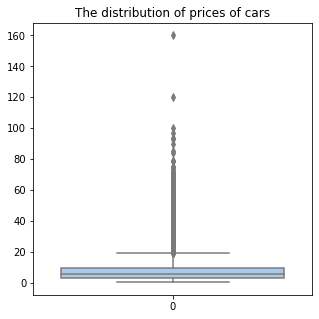

In [14]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("The distribution of prices of cars")
#for checking outliers if they exist
sb.boxplot(data=car_data['Price'],palette="pastel")

As we can most of the cars were sold below 50 Lakhs.

Let us see the distribution of dependent variables(categorical)

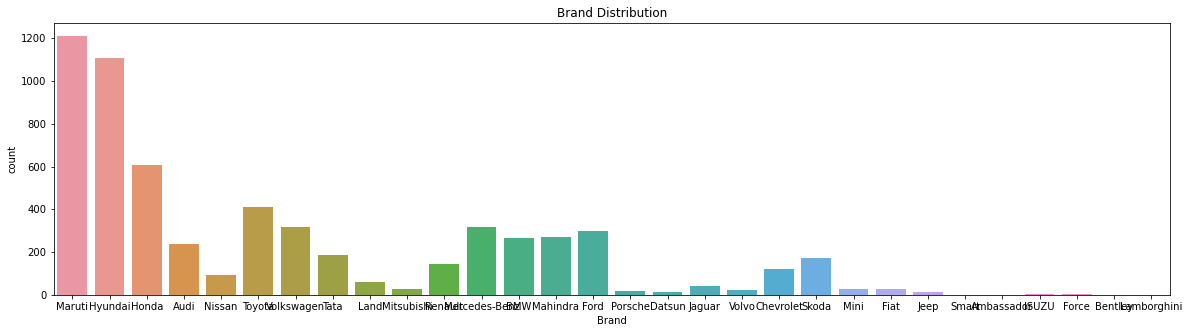

In [78]:
#We make use of pie charts to represent the fields in each category
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sb.countplot(x=car_data['Brand'])


Most numbers of car sold belonged to Brand Maruti followed by Hyundai and Honda

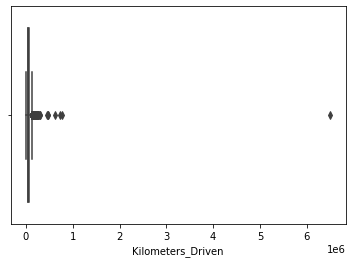

In [357]:
sb.boxplot(x=car_data['Kilometers_Driven'])

<ipython-input-358-7c37f8cb5be9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['Kilometers_Driven']=np.log(car_data['Kilometers_Driven'])


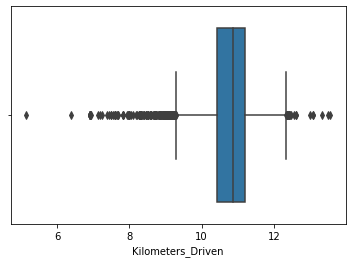

In [358]:
car_data['Kilometers_Driven'].astype('float64')
car_data['Kilometers_Driven']=car_data['Kilometers_Driven'].apply(lambda x: x if x <= 6000000 else -1)
car_data=car_data[car_data['Kilometers_Driven']!=-1]
car_data['Kilometers_Driven']=np.log(car_data['Kilometers_Driven'])
sb.boxplot(car_data['Kilometers_Driven'])

Text(0.5, 1.0, 'Seats distribution')

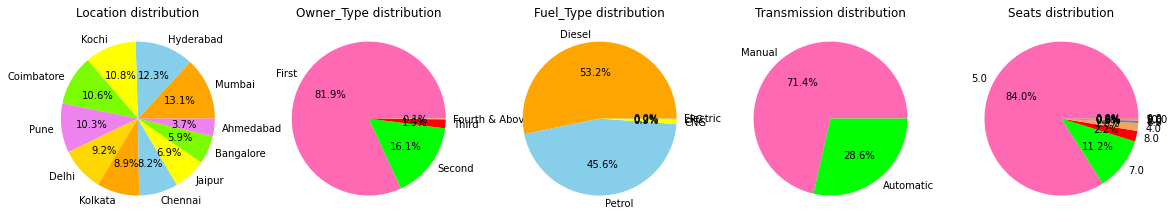

In [18]:
c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
glab=car_data['Location'].value_counts().index
gval=car_data['Location'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Location distribution")
plt.subplot(1,5,2)
glab=car_data['Owner_Type'].value_counts().index
gval=car_data['Owner_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Owner_Type distribution")
plt.subplot(1,5,3)
glab=car_data['Fuel_Type'].value_counts().index
gval=car_data['Fuel_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Fuel_Type distribution")
plt.subplot(1,5,4)
glab=car_data['Transmission'].value_counts().index
gval=car_data['Transmission'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Transmission distribution")
plt.subplot(1,5,5)
glab=car_data['Seats'].value_counts().index
gval=car_data['Seats'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Seats distribution")

From the above graphs we can see that:
1. Most of the cars were sold in Mumbai, follwed by Hyderabad and Kochi so on.
2. There were more of first hand cars
3. There were more Diesel type cars that were being sold
4. More Manual cars compared to automatic cars

Let us begin by exploring the influence of independent variables on dependent variables

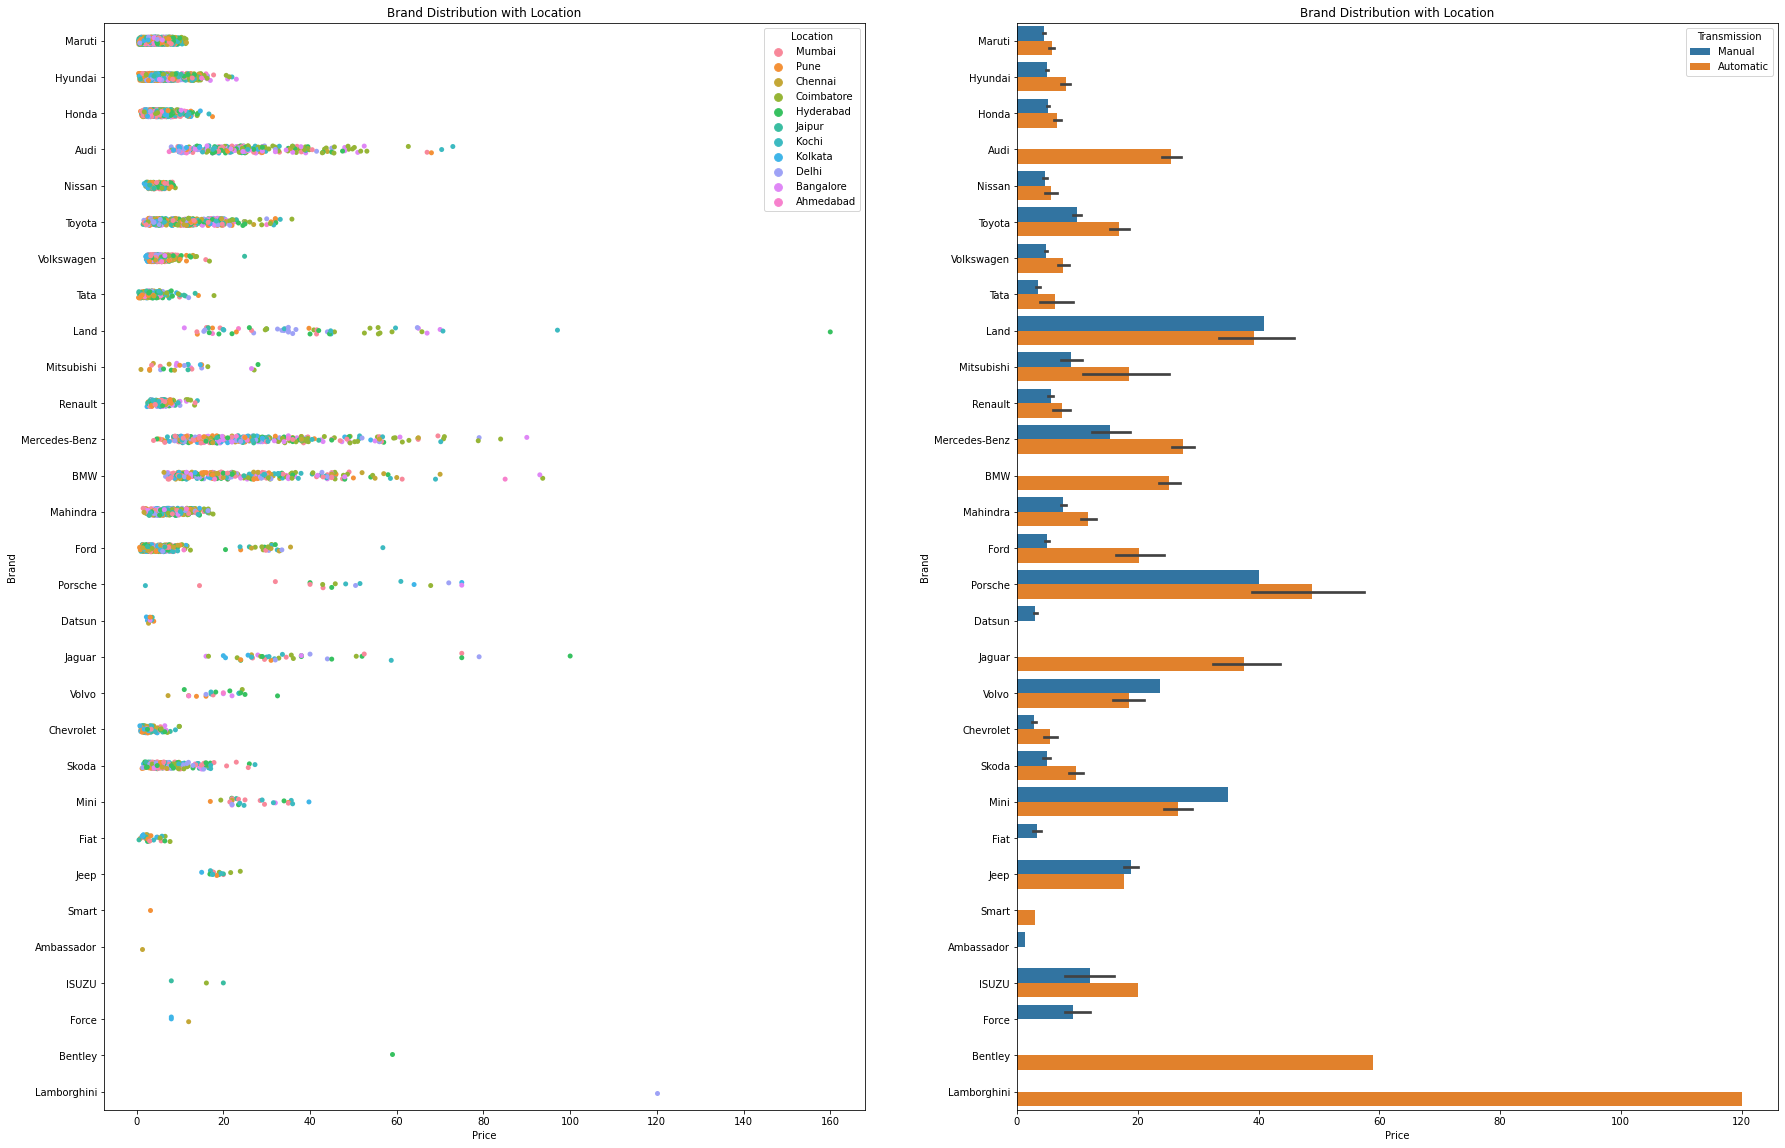

In [76]:
#Cars price based on their brand  with influence of location
plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.title("Brand Distribution with Location")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Location'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Location")
sb.barplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Transmission'])


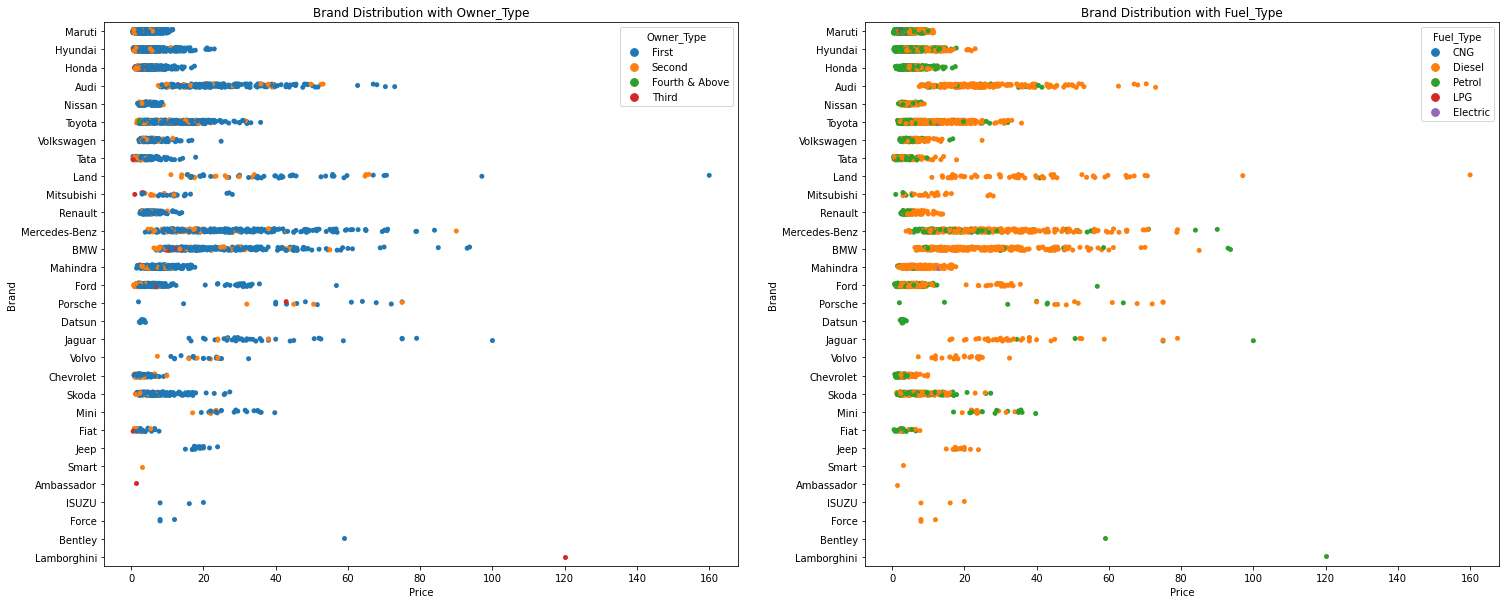

In [77]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Brand Distribution with Owner_Type")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Fuel_Type")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Fuel_Type'])


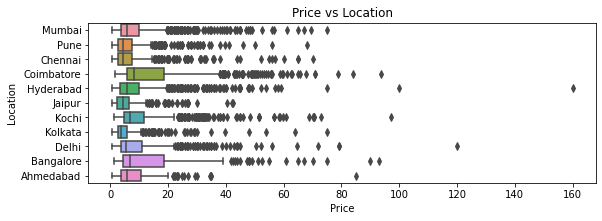

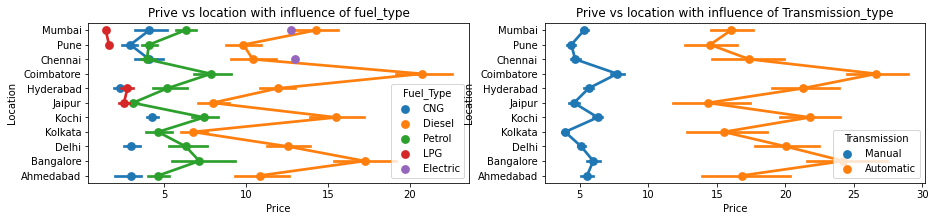

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.title("Price vs Location")
sb.boxplot(y=car_data['Location'],x=car_data['Price'])
plt.figure(figsize=(15,10))
plt.subplot(3,2,3)
plt.title("Prive vs location with influence of fuel_type")
sb.pointplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Fuel_Type"])
plt.subplot(3,2,4)
plt.title("Prive vs location with influence of Transmission_type")
sb.pointplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Transmission"])


From the above graphs we can see that: 
1. Hyderabad made on sale with highest price, the mean sales were higher in coimbatore followed by bangalore and kochi.
2. Disel cars were sold for higher proce compared to others irrespective of location, only 2 electric cars were sold in Mumbai and chennai with relatively same price, LPG were sold at lowest price but not in hyderabad
3. Automatic cars were sold at more price irespective of the locations where they are sold.

Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

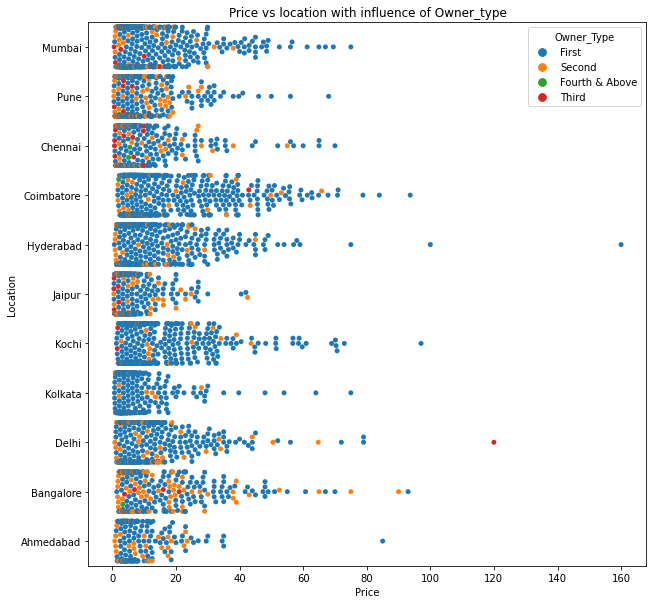

In [18]:

plt.figure(figsize=(10,10))
sb.swarmplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")


Form the above graph we can see that the first hand cars made more price, however the second hand cars also made higher price in bangalore.

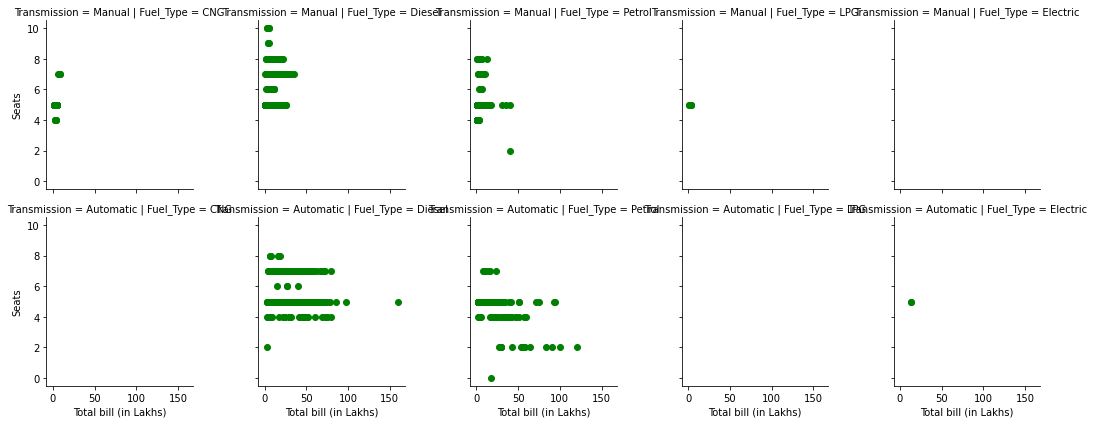

In [17]:
g = sb.FacetGrid(car_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Seats", color="g")
      .set_axis_labels("Total bill (in Lakhs)", "Seats"))

In [17]:
Owners = {'First': 1,'Second': 2,'Fourth & Above': 4, 'Third': 3}
car_data['Owners'] = [Owners[item] for item in car_data['Owner_Type']]
car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Owners
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,2
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,1


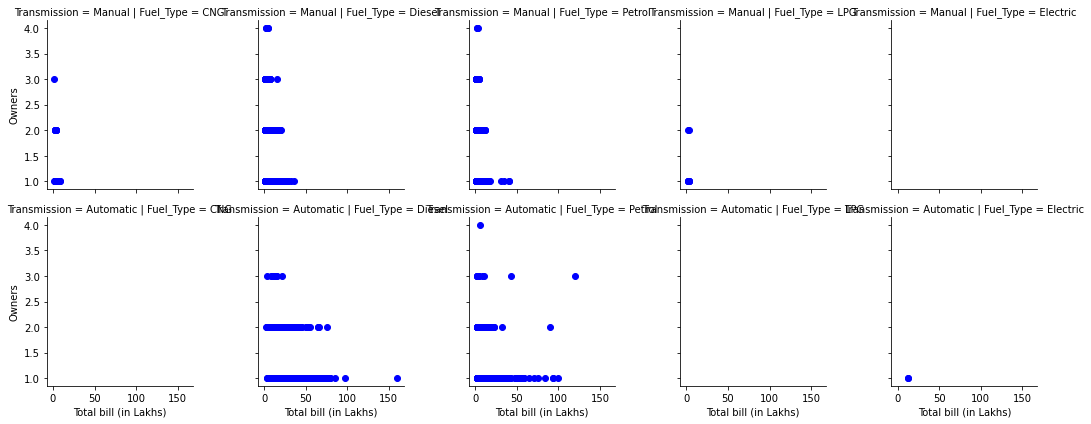

In [22]:
g = sb.FacetGrid(car_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Owners", color="b")
      .set_axis_labels("Total bill (in Lakhs)", "Owners"))

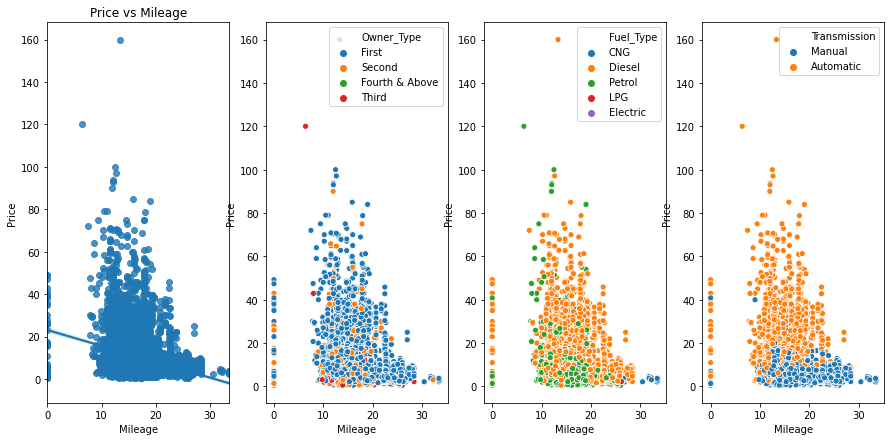

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Mileage'],y=car_data['Price'])
plt.title("Price vs Mileage")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Transmission'])

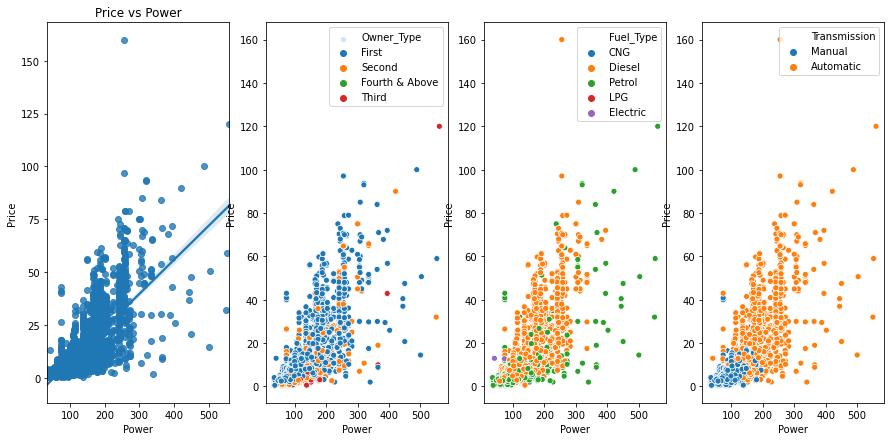

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Power'],y=car_data['Price'])
plt.title("Price vs Power")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Transmission'])

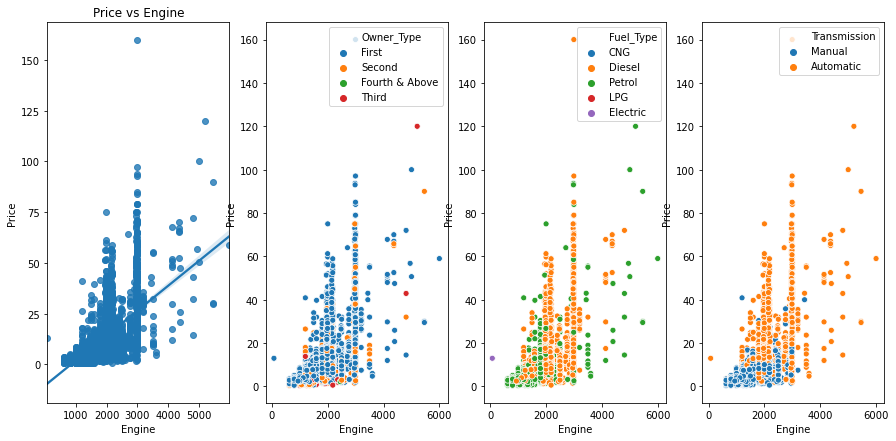

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Engine'],y=car_data['Price'])
plt.title("Price vs Engine")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Transmission'])

The higher the power and engine the higher the price in general, where as the cars that gave a mileage between 10-20 were sold for higher price.

## Feature Selection:


Extracting important features in our dataset :

In [359]:
car_data_X=car_data.loc[:, car_data.columns.isin(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Brand','Model'])]
car_data_y=car_data['Price']
car_data_X.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Brand,Model
0,Mumbai,2010,11.184421,CNG,Manual,First,Maruti,Wagon
1,Pune,2015,10.621327,Diesel,Manual,First,Hyundai,Creta
2,Chennai,2011,10.736397,Petrol,Manual,First,Honda,Jazz
3,Chennai,2012,11.373663,Diesel,Manual,First,Maruti,Ertiga
4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,Audi,A4


In [360]:
car_data_y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

Prior to that since there are categorical variables in our data let us convert them into numerical data by one_hot_encoding

In [361]:
one_hot = pd.get_dummies(car_data_X['Location'],prefix='Location')
car_data_X = car_data_X.drop('Location',axis = 1)
car_data_X=car_data_X.join(one_hot)
two_hot = pd.get_dummies(car_data_X['Fuel_Type'],prefix='Fuel')
car_data_X = car_data_X.drop('Fuel_Type',axis = 1)
car_data_X=car_data_X.join(two_hot)
three_hot = pd.get_dummies(car_data_X['Owner_Type'],prefix='Owner')
car_data_X = car_data_X.drop('Owner_Type',axis = 1)
car_data_X=car_data_X.join(three_hot)
two_hot = pd.get_dummies(car_data_X['Transmission'])
car_data_X = car_data_X.drop('Transmission',axis = 1)
car_data_X=car_data_X.join(two_hot)
#two_hot = pd.get_dummies(car_data_X['Seats'],prefix='Seats')
#car_data_X = car_data_X.drop('Seats',axis = 1)
#car_data_X=car_data_X.join(two_hot)


car_data_X.head()



,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,2010,11.184421,Maruti,Wagon,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,10.621327,Hyundai,Creta,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2011,10.736397,Honda,Jazz,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,2012,11.373663,Maruti,Ertiga,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,2013,10.613246,Audi,A4,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [362]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car_data_X["Brand"] = lb_make.fit_transform(car_data_X["Brand"])
car_data_X["Model"] = lb_make.fit_transform(car_data_X["Model"])

In [363]:
#car_data_X=car_data_X.drop(columns=['Mileage','Engine','Power',])

In [364]:
car_data_X.columns

Index(['Year', 'Kilometers_Driven', 'Brand', 'Model', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG',
       'Fuel_Petrol', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third', 'Automatic', 'Manual'],
      dtype='object')

In [365]:
car_data_X['Year']=car_data_X['Year'].apply(lambda x: 2019-x)
car_data_X.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,9,11.184421,17,189,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,4,10.621327,10,53,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,8,10.736397,9,99,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,7,11.373663,17,69,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,6,10.613246,1,10,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


Now all our data is of numerical type, lets go ahead to find and rank the important features.

In [366]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=car_data_X.astype('int')
y=car_data_y.astype('int')

In [367]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Year,4545.106001
1,Kilometers_Driven,28.857119
2,Brand,1176.419245
3,Model,11229.538838
4,Location_Ahmedabad,78.371398
5,Location_Bangalore,141.208853
6,Location_Chennai,106.819732
7,Location_Coimbatore,394.577870
8,Location_Delhi,107.840472
9,Location_Hyderabad,61.029595


In [368]:
print(featureScores.nlargest(25,'Score'))

                  Specs         Score
3                 Model  11229.538838
0                  Year   4545.106001
24            Automatic   1944.773146
2                 Brand   1176.419245
25               Manual    777.637832
19          Fuel_Petrol    630.509888
16          Fuel_Diesel    585.549723
7   Location_Coimbatore    394.577870
23          Owner_Third    305.653755
22         Owner_Second    253.407937
11       Location_Kochi    201.514131
12     Location_Kolkata    184.048497
10      Location_Jaipur    168.915510
5    Location_Bangalore    141.208853
14        Location_Pune    132.645822
8        Location_Delhi    107.840472
6      Location_Chennai    106.819732
13      Location_Mumbai     85.841822
20          Owner_First     82.299207
4    Location_Ahmedabad     78.371398
15             Fuel_CNG     75.478571
9    Location_Hyderabad     61.029595
17        Fuel_Electric     59.568431
1     Kilometers_Driven     28.857119
18             Fuel_LPG     26.679917


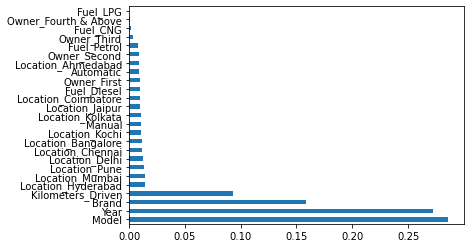

In [369]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

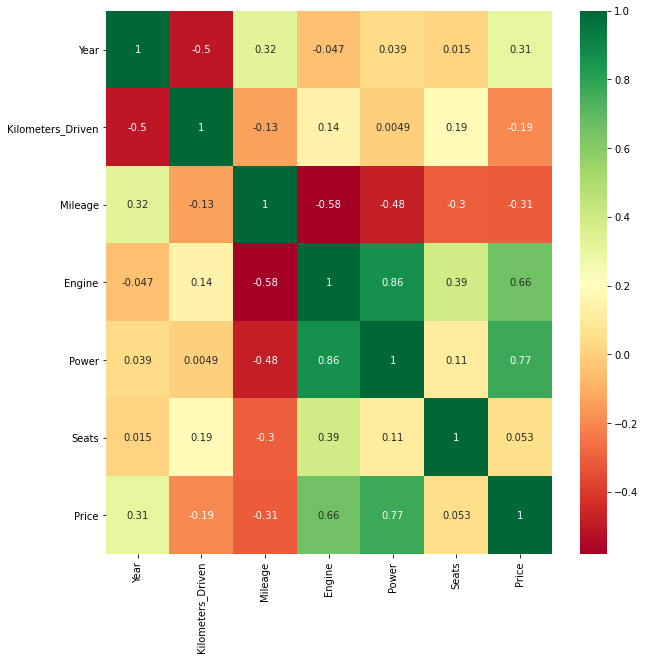

In [203]:
corrmat = car_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sb.heatmap(car_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [370]:
#Formating out prediction data accoriding to our training data
car_test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [371]:
car_test_data=car_test_data.drop(columns=['Mileage', 'Engine', 'Power','Seats'])

In [372]:
one_hot = pd.get_dummies(car_test_data['Location'],prefix='Location')
car_test_data = car_test_data.drop('Location',axis = 1)
car_test_data=car_test_data.join(one_hot)
two_hot = pd.get_dummies(car_test_data['Fuel_Type'],prefix='Fuel')
car_test_data = car_test_data.drop('Fuel_Type',axis = 1)
car_test_data=car_test_data.join(two_hot)
three_hot = pd.get_dummies(car_test_data['Owner_Type'],prefix='Owner')
car_test_data = car_test_data.drop('Owner_Type',axis = 1)
car_test_data=car_test_data.join(three_hot)
two_hot = pd.get_dummies(car_test_data['Transmission'])
car_test_data = car_test_data.drop('Transmission',axis = 1)
car_test_data=car_test_data.join(two_hot)
#two_hot = pd.get_dummies(car_test_data['Seats'],prefix='Seats')
#car_test_data = car_test_data.drop('Seats',axis = 1)
#car_test_data=car_test_data.join(two_hot)
lb_make = LabelEncoder()



In [373]:
car_test_data['Brand']=car_test_data['Name'].str.split(" ",2)
x=pd.DataFrame(car_test_data['Brand'])
car_test_data['Brand']=x['Brand'].str.get(0)
car_test_data['Model']=x['Brand'].str.get(1)


car_test_data["Brand"] = lb_make.fit_transform(car_test_data["Brand"])
car_test_data["Model"] = lb_make.fit_transform(car_test_data["Model"])


In [391]:
car_test_data=car_test_data.drop(columns=['Name'])
car_test_data['Kilometers_Driven']=np.log(car_test_data['Kilometers_Driven'])


In [392]:
car_test_data['Year']=car_test_data['Year'].apply(lambda x: 2019-x)
car_test_data.head()

,Year,Kilometers_Driven,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual,Brand,Model
0,5,0.859805,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,16,16
1,6,0.870999,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,16,16
2,2,0.852320,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,26,78
3,7,0.904895,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,26,60
4,5,0.845748,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,9,159


# Data Splitting: 

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_data_X, car_data_y, test_size = 0.2)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 1914 to 1080
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4814 non-null   int64  
 1   Kilometers_Driven     4814 non-null   float64
 2   Brand                 4814 non-null   int32  
 3   Model                 4814 non-null   int32  
 4   Location_Ahmedabad    4814 non-null   uint8  
 5   Location_Bangalore    4814 non-null   uint8  
 6   Location_Chennai      4814 non-null   uint8  
 7   Location_Coimbatore   4814 non-null   uint8  
 8   Location_Delhi        4814 non-null   uint8  
 9   Location_Hyderabad    4814 non-null   uint8  
 10  Location_Jaipur       4814 non-null   uint8  
 11  Location_Kochi        4814 non-null   uint8  
 12  Location_Kolkata      4814 non-null   uint8  
 13  Location_Mumbai       4814 non-null   uint8  
 14  Location_Pune         4814 non-null   uint8  
 15  Fuel_CNG          

# Model 1: Linear Regression

In [377]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred_linear = lreg.predict(X_test)
print('The Score on the train set with a linear regression is:', lreg.score(X_train,y_train))
print('The Score on the test set with a linear regression is:', lreg.score(X_test,y_test))
print("Accuracy :",lreg.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error (rmse): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("The r2_score is: ", r2_score(y_test, y_pred_linear))


The Score on the train set with a linear regression is: 0.49083985382198686
The Score on the test set with a linear regression is: 0.4393466966722985
Accuracy : 43.93466966722985 %
Mean squared error (rmse): 9.12
The r2_score is:  0.4393466966722984


# Model 2: Random Forest Regressor

In [378]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)
y_pred_rf=regressor.predict(X_test)
print('The Score on the training set with  a Random Forest  regression is:', regressor.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',regressor.score(X_test,y_test))
print("Accuracy :",regressor.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("The r2_score is: ", r2_score(y_test, y_pred_rf))



The Score on the training set with  a Random Forest  regression is: 0.9728853011875714
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.7582592985658558
Accuracy : 75.82592985658559 %
Mean squared error: 5.99
The r2_score is:  0.7582592985658558


In [379]:
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()

n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

best_model = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.4s finished


In [380]:
best_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [381]:
rand_est = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto',max_depth=100,bootstrap=True)
rand_est.fit(X_train,y_train)
y_pred_rfr = rand_est.predict(X_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9516597281391117
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.7601814971832221
Mean squared error: 5.97


# Model 3: XGBoost

In [382]:
import xgboost as xgb
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.5,max_depth = 45, alpha = 30, n_estimators = 200)
xg_reg1.fit(X_train,y_train)
preds = xg_reg1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("The r2_score is: ", r2_score(y_test,preds))
print('The Score on the train set with XGBoost is:', xg_reg1.score(X_train,y_train))
print('The Score on the test set with XGBoost is:', xg_reg1.score(X_test,y_test))
print("Accuracy :",xg_reg1.score(X_test,y_test)*100,'%')

RMSE: 5.565478
The r2_score is:  0.7912513999510536
The Score on the train set with XGBoost is: 0.9685628472923733
The Score on the test set with XGBoost is: 0.7912513999510536
Accuracy : 79.12513999510537 %


# Model 4: K-Neighbours

In [383]:
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train,y_train)
k_pred=neigh.predict(X_test)
print('The Score on the test set with a Kneighbours  regression is:', neigh.score(X_test,y_test))
print("Accuracy :",neigh.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test,k_pred )))
print("The r2_score is: ", r2_score(y_test, k_pred))



The Score on the test set with a Kneighbours  regression is: 0.4969877355127263
Accuracy : 49.69877355127263 %
Mean squared error: 8.64
The r2_score is:  0.49698773551272635


# Model : Lasso Regression

In [384]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.15)
clf.fit(X_train,y_train)
lasso_predict=clf.predict(X_test)
print('The Score on the test set with a Lasso  regression is:', clf.score(X_test,y_test))
print("Accuracy :",clf.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, lasso_predict)))
print("The r2_score is: ", r2_score(y_test, lasso_predict))


The Score on the test set with a Lasso  regression is: 0.4371455584550528
Accuracy : 43.71455584550528 %
Mean squared error: 9.14
The r2_score is:  0.43714555845505276


# Model :SVM 

In [385]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print('The Score on the test set with a Support Vector regression is:', regressor.score(X_test,y_test))
print("Accuracy :",regressor.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("The r2_score is: ", r2_score(y_test, y_pred))

The Score on the test set with a Support Vector regression is: 0.4633690685568139
Accuracy : 46.33690685568139 %
Mean squared error: 8.92
The r2_score is:  0.4633690685568139


# Model : CatBoostRegressor

In [386]:
model = CatBoostRegressor(iterations=50,learning_rate=0.45,depth=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('The Score on the test set with a Support Vector regression is:', model.score(X_test,y_test))
print("Accuracy :",model.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("The r2_score is: ", r2_score(y_test, y_pred))

0:	learn: 8.5027732	total: 2ms	remaining: 97.9ms
1:	learn: 7.4417355	total: 3.56ms	remaining: 85.4ms
2:	learn: 6.9074417	total: 5.39ms	remaining: 84.4ms
3:	learn: 6.6306016	total: 6.78ms	remaining: 78ms
4:	learn: 6.4276973	total: 8.13ms	remaining: 73.1ms
5:	learn: 6.2476302	total: 9.41ms	remaining: 69ms
6:	learn: 6.0627150	total: 10.7ms	remaining: 65.6ms
7:	learn: 5.9277297	total: 11.9ms	remaining: 62.6ms
8:	learn: 5.6860413	total: 13.2ms	remaining: 60.2ms
9:	learn: 5.6069123	total: 14.5ms	remaining: 58.2ms
10:	learn: 5.5488864	total: 15.9ms	remaining: 56.4ms
11:	learn: 5.3954562	total: 17.3ms	remaining: 54.7ms
12:	learn: 5.3654030	total: 18.8ms	remaining: 53.4ms
13:	learn: 5.2214641	total: 20.3ms	remaining: 52.3ms
14:	learn: 5.1382728	total: 21.7ms	remaining: 50.6ms
15:	learn: 5.0011408	total: 23ms	remaining: 48.9ms
16:	learn: 4.7767836	total: 24.3ms	remaining: 47.1ms
17:	learn: 4.7288300	total: 25.6ms	remaining: 45.5ms
18:	learn: 4.6894992	total: 27.7ms	remaining: 45.2ms
19:	learn: 4

In [393]:
#app1_test=car_test_data.drop(columns='Name')
app1_test=car_test_data
app1_test.head()

,Year,Kilometers_Driven,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual,Brand,Model
0,5,0.859805,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,16,16
1,6,0.870999,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,16,16
2,2,0.852320,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,26,78
3,7,0.904895,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,26,60
4,5,0.845748,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,9,159


In [404]:
app1_test['Fuel_Electric']=0
app1_test=app1_test[car_data_X.columns]
app1_test.columns
app12_test=app1_test
app12_test

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,5,0.859805,16,16,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,6,0.870999,16,16,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2,0.852320,26,78,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,7,0.904895,26,60,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,5,0.845748,9,159,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,8,0.889413,27,137,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1230,4,0.874033,27,101,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1231,7,0.844278,20,91,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1232,6,0.869391,27,101,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [395]:
car_data_X.columns

Index(['Year', 'Kilometers_Driven', 'Brand', 'Model', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG',
       'Fuel_Petrol', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third', 'Automatic', 'Manual'],
      dtype='object')

In [406]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(xg_reg1) 
# Load the pickled model 
xg_reg1_from_pickle = pickle.loads(saved_model) 
# Use the loaded pickled model to make predictions 
Prediction_1=xg_reg1_from_pickle.predict(app1_test.values) 

# Save the trained model as a pickle string. 
saved_model12 = pickle.dumps(rand_est) 
# Load the pickled model 
rand_est_from_pickle = pickle.loads(saved_model12) 
# Use the loaded pickled model to make predictions 
Prediction_12=rand_est_from_pickle.predict(app12_test.values) 


In [402]:
prediction1=pd.DataFrame(Prediction_1)
prediction1

,0
0,1.636915
1,2.705885
2,1.807759
3,1.705613
4,2.641127
...,...
1229,1.636915
1230,6.177319
1231,1.631850
1232,6.328394


In [407]:
prediction12=pd.DataFrame(Prediction_12)
prediction12

,0
0,4.077077
1,4.034129
2,4.144701
3,4.064291
4,4.058330
...,...
1229,4.081391
1230,11.653927
1231,4.077077
1232,11.652613


# APPROACH 2:

In [242]:
training_set=car_data
training_set
test_set=car_test_data
training_set=training_set.drop(columns='Name')

In [243]:
test_set['Brand']=test_set['Name'].str.split(" ",2)
x=pd.DataFrame(test_set['Brand'])
test_set['Brand']=x['Brand'].str.get(0)
test_set['Model']=x['Brand'].str.get(1)
test_set=test_set.drop(columns='Name')

In [244]:
training_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [245]:
test_set.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,Maruti,Alto
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0,Toyota,Etios
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai,i20


In [246]:
all_brands = list(set(list(training_set.Brand) + list(test_set.Brand)))
all_models = list(set(list(training_set.Model) + list(test_set.Model)))
all_locations = list(set(list(training_set.Location) + list(test_set.Location)))
all_fuel_types = list(set(list(training_set.Fuel_Type) + list(test_set.Fuel_Type)))
all_transmissions = list(set(list(training_set.Transmission) + list(test_set.Transmission)))
all_owner_types = list(set(list(training_set.Owner_Type) + list(test_set.Owner_Type)))

In [247]:
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

#Fitting the categories

In [248]:
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [249]:
#Applying encoding to Training_set data
training_set['Brand'] = le_brands.transform(training_set['Brand'])
training_set['Model'] = le_models.transform(training_set['Model'])
training_set['Location'] = le_locations.transform(training_set['Location'])
training_set['Fuel_Type'] = le_fuel_types.transform(training_set['Fuel_Type'])
training_set['Transmission'] = le_transmissions.transform(training_set['Transmission'])
training_set['Owner_Type'] = le_owner_types.transform(training_set['Owner_Type'])

#Applying encoding to Test_set data
test_set['Brand'] = le_brands.transform(test_set['Brand'])
test_set['Model'] = le_models.transform(test_set['Model'])
test_set['Location'] = le_locations.transform(test_set['Location'])
test_set['Fuel_Type'] = le_fuel_types.transform(test_set['Fuel_Type'])
test_set['Transmission'] = le_transmissions.transform(test_set['Transmission'])
test_set['Owner_Type'] = le_owner_types.transform(test_set['Owner_Type'])

In [250]:
training_set_y=pd.DataFrame(training_set['Price'])

In [251]:
training_set=training_set.drop(columns='Price')

In [252]:
training_set_X=training_set

In [253]:
X2_train, X2_test, y2_train, y2_test = train_test_split(training_set_X, training_set_y, test_size = 0.2)
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 1676 to 603
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4815 non-null   int32  
 1   Year               4815 non-null   int64  
 2   Kilometers_Driven  4815 non-null   int64  
 3   Fuel_Type          4815 non-null   int32  
 4   Transmission       4815 non-null   int32  
 5   Owner_Type         4815 non-null   int32  
 6   Mileage            4815 non-null   float64
 7   Engine             4815 non-null   float64
 8   Power              4815 non-null   float64
 9   Seats              4815 non-null   float64
 10  Brand              4815 non-null   int32  
 11  Model              4815 non-null   int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 376.2 KB


# Model 1: Linear Regression:

In [255]:
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)
lreg = LinearRegression()
lreg.fit(X2_train,y2_train)
y2_pred_linear = lreg.predict(X2_test)
print('The Score on the test set with a linear regression is:', lreg.score(X2_test,y2_test))
# The Root mean squared error
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y2_test, y2_pred_linear)))

The Score on the test set with a linear regression is: 0.6961813926204818
Mean squared error: 5.71


# Model 2: Random Forest 

In [256]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()

n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

best_model = rf_random.fit(X2_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   28.2s finished
c:\users\madhu\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [260]:
best_model.best_params_

{'n_estimators': 64,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [261]:

from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor(max_depth=80, n_estimators= 64, min_samples_split= 2, min_samples_leaf= 1, bootstrap= False, max_features= 'sqrt')
rand_est.fit(X2_train,y2_train)
y2_pred_rfr = rand_est.predict(X2_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X2_train,y2_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X2_test,y2_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y2_test, y2_pred_rfr)))

<ipython-input-261-e7e426e60e86>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_est.fit(X2_train,y2_train)


 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9999981085732977
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.9316140190841109
Mean squared error: 2.71


# Model 3: XGBoost

In [262]:
import xgboost as xgb
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.5,max_depth = 25, alpha = 35, n_estimators = 150)
xg_reg2.fit(X2_train,y2_train)
preds2 = xg_reg2.predict(X2_test)
rmse = np.sqrt(mean_squared_error(y2_test, preds2))
print("RMSE: %f" % (rmse))
print("The r2_score is: ", r2_score(y2_test,preds2))
print('The Score on the train set with XGBoost is:', xg_reg2.score(X2_train,y2_train))
print('The Score on the test set with XGBoost is:', xg_reg2.score(X2_test,y2_test))
print("Accuracy :",xg_reg2.score(X2_test,y2_test)*100,'%')

RMSE: 2.805949
The r2_score is:  0.9265715249653721
The Score on the train set with XGBoost is: 0.9773940019383425
The Score on the test set with XGBoost is: 0.9265715249653721
Accuracy : 92.65715249653721 %


In [264]:
test_set=test_set[training_set_X.columns]

In [279]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(xg_reg2) 
  
# Load the pickled model 
xg_reg2_from_pickle = pickle.loads(saved_model2) 
  
# Use the loaded pickled model to make predictions 
Prediction_2=xg_reg2_from_pickle.predict(test_set.values) 

In [409]:
#Approach2 --- XGBoost predictions on test data
Prediction2=pd.DataFrame(Prediction_2)
Prediction2

,0
0,21.179163
1,17.857710
2,18.244665
3,18.244665
4,18.244665
...,...
1229,18.244665
1230,18.244665
1231,18.244665
1232,17.787828


In [399]:
#Approach1 --- XGBoost predictions on test data
prediction1

,0
0,1.636915
1,2.705885
2,1.807759
3,1.705613
4,2.641127
...,...
1229,1.636915
1230,6.177319
1231,1.631850
1232,6.328394


In [408]:
#Approach1 --- Random Forest predictions on test data
prediction12

,0
0,4.077077
1,4.034129
2,4.144701
3,4.064291
4,4.058330
...,...
1229,4.081391
1230,11.653927
1231,4.077077
1232,11.652613
